# TEAM 7
# Bed Occupancy Pattern Analysis

This notebook investigates patterns in bed occupancy data to identify potential bottlenecks in patient flow and to validate the proper handling of different operational situations within the hospital.

**_IMPORTANT:_ This analysis will focus solely on the investigation and identification of existing patterns. It will NOT involve any form of prediction or forecasting.**

## Dataset Assumptions

Our analysis is based on the following interpretation of the dataset:

* A row with `requirement = 'taken'` and `status = 'required'` signifies a **new arrival being assigned a bed**.
* A row with `requirement = 'taken'` and `status = 'satisfied'` indicates that a **previously occupied bed is now ready for a new arrival**.
* Therefore, the time difference between a corresponding 'required' and 'satisfied' record for the 'taken' requirement represents the **duration for which the bed was occupied**.

## Workflow

The analysis will proceed through the following stages:

1.  **Data Cleaning and Augmentation:** The initial dataset will be cleaned to handle missing values and inconsistencies. New fields necessary for the analysis, such as the duration of bed occupancy, will be calculated.
2.  **Pattern Investigation:** Various analytical techniques and visualizations will be employed to explore patterns in bed occupancy across different departments, rooms, and time periods.

## Data Limitations

It is important to note a significant limitation regarding the available data:

**Due to missing corresponding 'satisfied' records for requirements other than 'taken', it is currently impossible to accurately determine the duration of any task or process associated with those other requirements.**

**_Note to the Hospital:_** To enable more comprehensive and insightful analysis in the future, it is strongly advised to improve data collection practices to ensure complete records for all requirements, including the corresponding 'satisfied' status and timestamps. This enhancement would allow for the evaluation of the duration of various critical hospital processes and further optimize operational efficiency.

In [1]:
import pandas as pd

In [2]:
# Load all the data set
# !!! The file removed from thee Github repo! On local environment must be placed locally !!!"
Full_ds = pd.read_csv('./ED_full_data.csv')
Full_ds

,timestamp,department,room,requirement,status
0,2023-11-08 08:12:03.787+00,מיון כירורגיה - מ.הלכים,חדר הלם,רמת דחיפות,4
1,2023-11-08 08:12:03.787+00,מיון פנימי,מיון קורונה ב`,רמת דחיפות,3
2,2024-03-18 10:08:57.218644+00,A,A104,ניקיון تنظيف,satisfied
3,2024-03-18 10:08:58.083959+00,A,A104,ניקיון تنظيف,required
4,2024-03-18 13:54:53.606752+00,טראומה חדש,T5,כח עזר - אוכל,satisfied
...,...,...,...,...,...
463892,2025-01-23 10:07:21.914702+00,A,A114,בדיקת רופא,satisfied
463893,2025-01-23 10:10:50.11309+00,C,C316,בדיקת רופא,satisfied
463894,2025-01-23 10:14:00.298704+00,A,A104,בדיקת דם,required
463895,2025-01-23 10:14:00.298704+00,A,A104,תפוס,required


In [3]:
# Filter full dataset by requirement, then sort by 'room' and 'timestamp'
Bed_ds = Full_ds[Full_ds['requirement'] == 'תפוס'].sort_values(by=['room', 'timestamp'])
Bed_ds.info

<bound method DataFrame.info of                             timestamp        department        room  \
488     2024-05-22 07:09:59.424797+00  מלר"ד אגף מהלכים         403   
12106   2024-06-27 05:29:59.742149+00  מלר"ד אגף מהלכים         403   
12817   2024-06-27 14:18:39.336118+00  מלר"ד אגף מהלכים         403   
12823   2024-06-27 14:21:08.892152+00  מלר"ד אגף מהלכים         403   
12829   2024-06-27 14:22:49.570864+00  מלר"ד אגף מהלכים         403   
...                               ...               ...         ...   
8677    2024-06-25 11:48:59.254715+00        טראומה חדש          T6   
8700    2024-06-25 12:09:02.448333+00        טראומה חדש          T6   
278837  2024-11-01 10:42:17.797715+00        טראומה חדש          T6   
279170  2024-11-01 12:52:41.433563+00        טראומה חדש          T6   
490     2024-05-22 07:14:21.019975+00  מלר"ד אגף מהלכים  חדר ספטי 9   

       requirement     status  
488           תפוס  satisfied  
12106         תפוס   required  
12817         תפוס 

In [4]:

# parse 'timestamp' column and save in new column 'dt'
Bed_ds['dt'] = pd.to_datetime(Bed_ds['timestamp'], format='ISO8601')

# add new column from consecutive row's 'status' column
Bed_ds['prev_status'] = Bed_ds['status'].shift(1)

# save date diff between two consecutive rows in hours
Bed_ds['dt_diff'] = Bed_ds['dt'].diff().dt.total_seconds() / 3600

Bed_ds

,timestamp,department,room,requirement,status,dt,prev_status,dt_diff
488,2024-05-22 07:09:59.424797+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-05-22 07:09:59.424797+00:00,None,NaN
12106,2024-06-27 05:29:59.742149+00,"מלר""ד אגף מהלכים",403,תפוס,required,2024-06-27 05:29:59.742149+00:00,satisfied,862.333421
12817,2024-06-27 14:18:39.336118+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 14:18:39.336118+00:00,required,8.810998
12823,2024-06-27 14:21:08.892152+00,"מלר""ד אגף מהלכים",403,תפוס,required,2024-06-27 14:21:08.892152+00:00,satisfied,0.041543
12829,2024-06-27 14:22:49.570864+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 14:22:49.570864+00:00,required,0.027966
...,...,...,...,...,...,...,...,...
8677,2024-06-25 11:48:59.254715+00,טראומה חדש,T6,תפוס,required,2024-06-25 11:48:59.254715+00:00,satisfied,2.010425
8700,2024-06-25 12:09:02.448333+00,טראומה חדש,T6,תפוס,satisfied,2024-06-25 12:09:02.448333+00:00,required,0.334220
278837,2024-11-01 10:42:17.797715+00,טראומה חדש,T6,תפוס,required,2024-11-01 10:42:17.797715+00:00,satisfied,3094.554264
279170,2024-11-01 12:52:41.433563+00,טראומה חדש,T6,תפוס,satisfied,2024-11-01 12:52:41.433563+00:00,required,2.173232


In [5]:
# we want to know only how long the bed was taken, thus we need only rows with 'status' == 'satisfied' and 'prev_status' = 'required' 
Bed_ds = Bed_ds[(Bed_ds['status'] == 'satisfied') & (Bed_ds['prev_status'] == 'required')]
Bed_ds

,timestamp,department,room,requirement,status,dt,prev_status,dt_diff
12817,2024-06-27 14:18:39.336118+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 14:18:39.336118+00:00,required,8.810998
12829,2024-06-27 14:22:49.570864+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 14:22:49.570864+00:00,required,0.027966
13254,2024-06-27 19:22:08.54775+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 19:22:08.547750+00:00,required,0.301340
26963,2024-07-05 07:19:30.046712+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-07-05 07:19:30.046712+00:00,required,1.315866
31500,2024-07-07 10:54:28.319812+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-07-07 10:54:28.319812+00:00,required,1.649139
...,...,...,...,...,...,...,...,...
284002,2024-11-03 20:21:13.295987+00,טראומה חדש,T5,תפוס,satisfied,2024-11-03 20:21:13.295987+00:00,required,0.341737
5180,2024-06-13 04:25:08.773388+00,טראומה חדש,T6,תפוס,satisfied,2024-06-13 04:25:08.773388+00:00,required,0.150506
8498,2024-06-25 09:48:21.724407+00,טראומה חדש,T6,תפוס,satisfied,2024-06-25 09:48:21.724407+00:00,required,0.169591
8700,2024-06-25 12:09:02.448333+00,טראומה חדש,T6,תפוס,satisfied,2024-06-25 12:09:02.448333+00:00,required,0.334220


In [6]:
from enum import Enum

# Maximum duration (in hours) a bed can be considered occupied.
# Rows with a 'dt_diff' (difference in time) exceeding this
# threshold are considered invalid and are filtered out.
MAX_BED_OCCUPANCY_HOURS = 48

# All the departments
class Department(Enum):
    A = 'A'
    B = 'B'
    C = 'C'
    MALRAD_MAHALKIM = 'מלר"ד אגף מהלכים'
    TRAUMA_HADASH = 'טראומה חדש'

In [7]:
# filter out rows with bed taken more than MAX_BED_OCCUPANCY_HOURS
Bed_ds = Bed_ds[Bed_ds['dt_diff'] < MAX_BED_OCCUPANCY_HOURS]

# filter out rows with negative dt_diff
Bed_ds = Bed_ds[Bed_ds['dt_diff'] > 0]

Bed_ds

,timestamp,department,room,requirement,status,dt,prev_status,dt_diff
12817,2024-06-27 14:18:39.336118+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 14:18:39.336118+00:00,required,8.810998
12829,2024-06-27 14:22:49.570864+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 14:22:49.570864+00:00,required,0.027966
13254,2024-06-27 19:22:08.54775+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-06-27 19:22:08.547750+00:00,required,0.301340
26963,2024-07-05 07:19:30.046712+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-07-05 07:19:30.046712+00:00,required,1.315866
31500,2024-07-07 10:54:28.319812+00,"מלר""ד אגף מהלכים",403,תפוס,satisfied,2024-07-07 10:54:28.319812+00:00,required,1.649139
...,...,...,...,...,...,...,...,...
284002,2024-11-03 20:21:13.295987+00,טראומה חדש,T5,תפוס,satisfied,2024-11-03 20:21:13.295987+00:00,required,0.341737
5180,2024-06-13 04:25:08.773388+00,טראומה חדש,T6,תפוס,satisfied,2024-06-13 04:25:08.773388+00:00,required,0.150506
8498,2024-06-25 09:48:21.724407+00,טראומה חדש,T6,תפוס,satisfied,2024-06-25 09:48:21.724407+00:00,required,0.169591
8700,2024-06-25 12:09:02.448333+00,טראומה חדש,T6,תפוס,satisfied,2024-06-25 12:09:02.448333+00:00,required,0.334220


At this point, the dataset 'Bed_ds' has undergone a cleaning process based

on several criteria (including, but not limited to, bed occupancy duration).

The dataset is now considered cleaned and ready for further analysis or processing.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

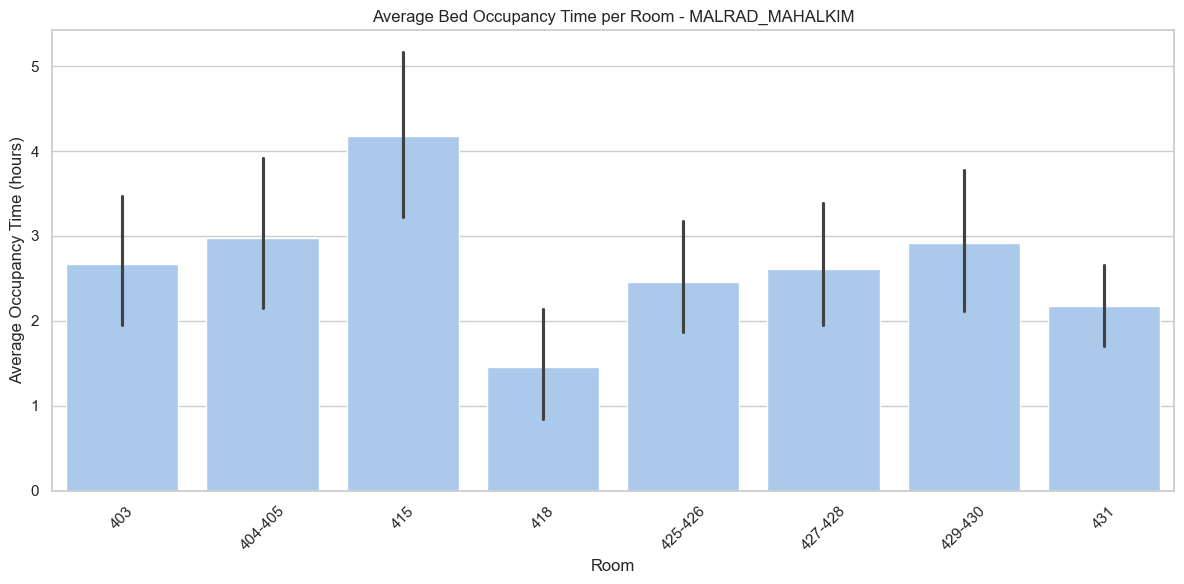

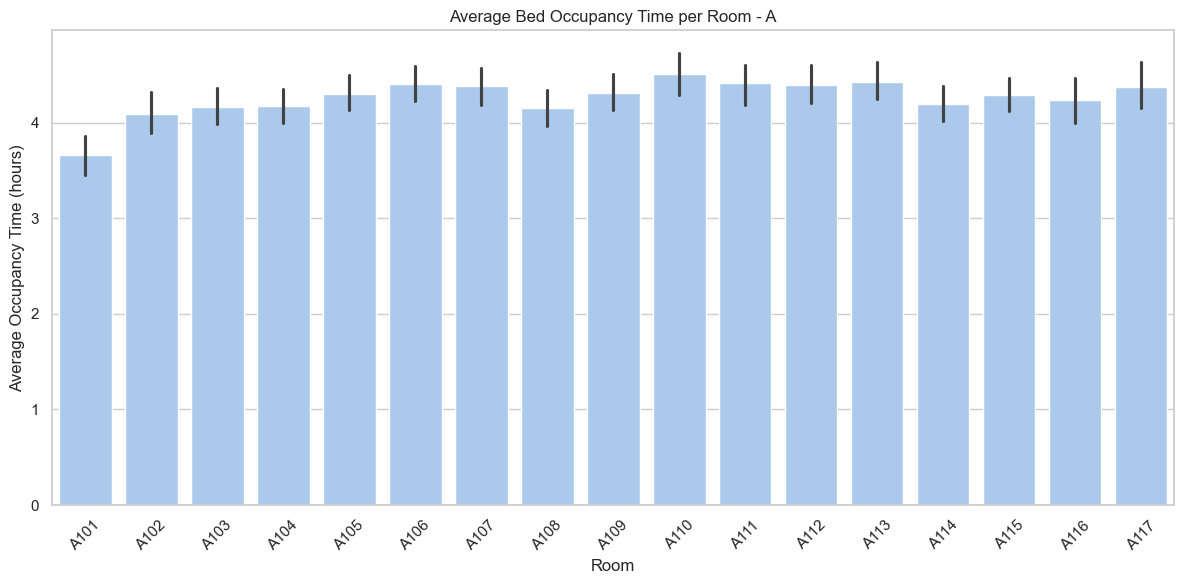

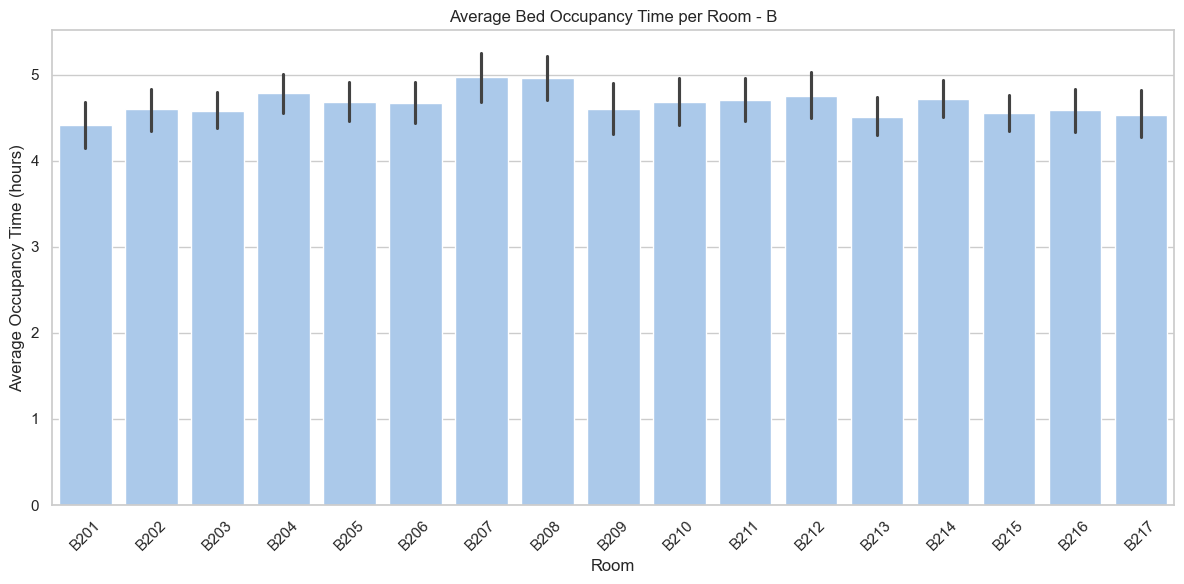

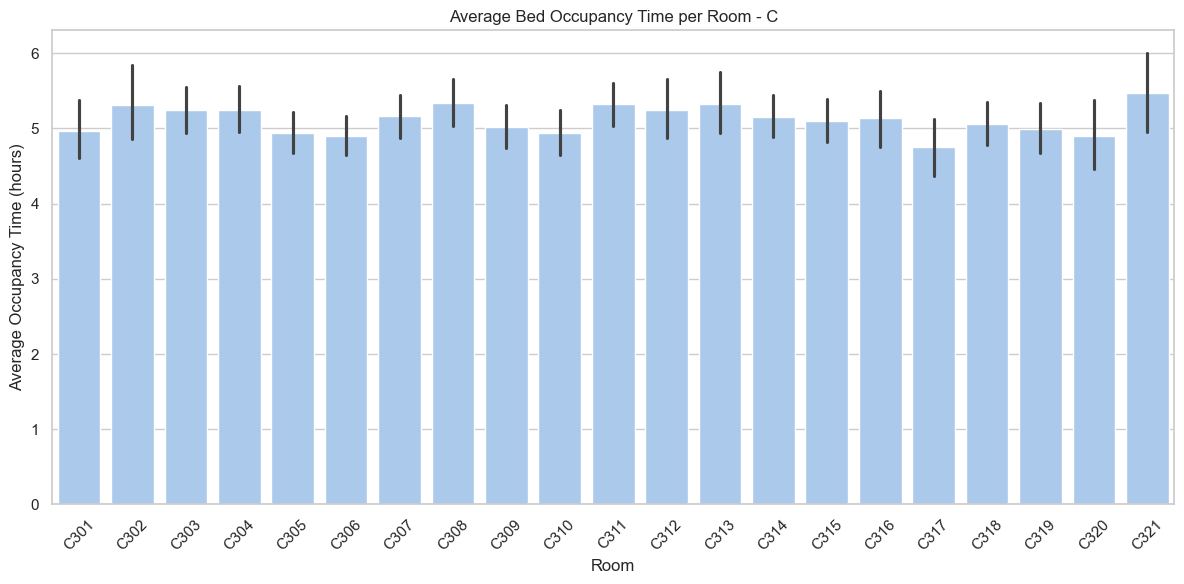

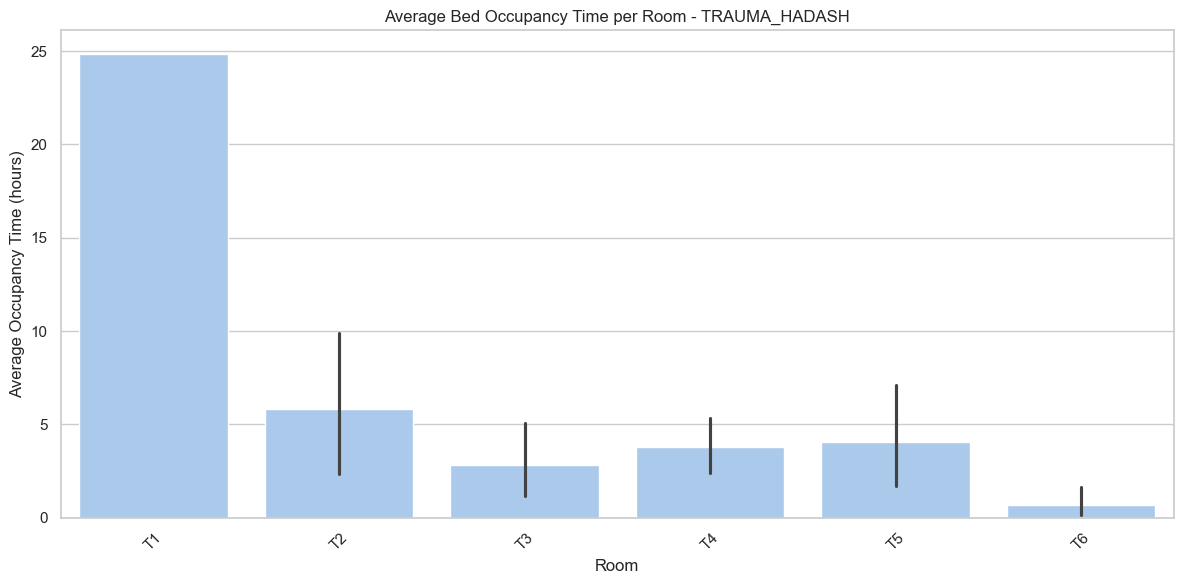

In [10]:
# Generate and display plots showing the average time taken for each bed
# categorized by different departments. These visualizations aim to provide
# insights into the variations in bed usage patterns and efficiency across
# different departments within the facility.

for dep in Bed_ds['department'].unique():

    dep_label = dep

    # replace Hebrew labels with English ones to fix reverse text presentation
    if dep == Department.MALRAD_MAHALKIM.value:
        dep_label = Department.MALRAD_MAHALKIM.name
    elif dep == Department.TRAUMA_HADASH.value:
        dep_label = Department.TRAUMA_HADASH.name

    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")
    sns.set_palette("pastel")
    plt.title('Average Bed Occupancy Time per Room - {0}'.format(dep_label))
    sns.barplot(data=Bed_ds[Bed_ds['department'] == dep], x='room', y='dt_diff', estimator='mean')
    plt.xlabel('Room')
    plt.ylabel('Average Occupancy Time (hours)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    pass


### Analysis of Department MALRAD_MAHALKIM

**Key Finding:** A significant discrepancy in average bed occupancy time was observed within Department MALRAD_MAHALKIM.

* **Room 415:** Exhibits a remarkably high average occupancy time of **415 hours**.
* **Room 418:** Shows a much lower average occupancy time of **4 hours**.

**Interpretation:** This substantial difference between the average occupancy times of Room 415 and Room 418 is unexpected. The operational expectation is for bed usage duration to be relatively consistent across all beds within the department.

**Potential Implications:** This finding warrants further investigation to understand the underlying reasons for this disparity. Potential causes could include:

* **Data anomalies or errors:** Incorrect recording of admission or discharge times for Room 415.
* **Process deviations:** A unique workflow or situation specific to Room 415 that leads to prolonged occupancy.
* **System issues:** Problems with bed management or tracking systems related to this particular room.

Further analysis is needed to determine the root cause of this inconsistency and ensure efficient and equitable bed utilization within the MALRAD_MAHALKIM department.

### Analysis of Department TRAUMA_HADASH

**Key Finding:** Significant variation in average bed occupancy time observed.

* **Room T1:** Average occupancy is more than double the department average.
* **Room T6:** Average occupancy is approximately one-tenth of the department average.

**Interpretation:** This large disparity suggests potential anomalies in bed usage or data recording for these specific rooms, warranting further review.

### Analysis of Departments A, B, and C

**Department A:**

* Shows relatively consistent average bed occupancy times overall.
* Exhibits a distinct "W" pattern with three peaks of higher average occupancy and two troughs of lower average occupancy.
* **Recommendation:** This pattern may indicate specific usage trends related to certain beds or periods and could be worth further investigation by hospital staff.

**Department B:**

* Presents a similar "W" pattern in average bed occupancy as Department A, though the peaks and troughs appear slightly less pronounced.
* **Recommendation:** Similar to Department A, the observed pattern warrants review by hospital staff to understand potential underlying factors.

**Department C:**

* Displays significant differences in average bed occupancy times between individual beds.
* **Recommendation:** The notable variations in bed usage within Department C should be evaluated by the staff to identify any potential issues or specific circumstances.

### Analysis of Daily Average Bed Occupancy (2024 & 2025)

**Visualization:** Time series plot showing the daily average bed occupancy time (across all rooms) on the Y-axis and the day of the year (1-365) on the X-axis, with separate plots for the each year.

**Objective:** To identify recurring patterns and trends in the overall daily bed utilization throughout the annual cycle for both years. By comparing the daily averages across 2024 and 2025, we aim to detect:

* **Seasonality:** Are there consistent periods of higher or lower average occupancy that occur at the same time each year (e.g., summer months, holiday periods)?
* **Weekly Cycles:** Do we observe any recurring patterns within a week (e.g., higher occupancy on certain days)?
* **Consistent Deviations:** Are there specific days of the year that consistently show unusually high or low average occupancy across both years?

Analyzing these patterns can provide valuable insights into the hospital's bed utilization trends and potentially inform resource allocation and scheduling strategies.

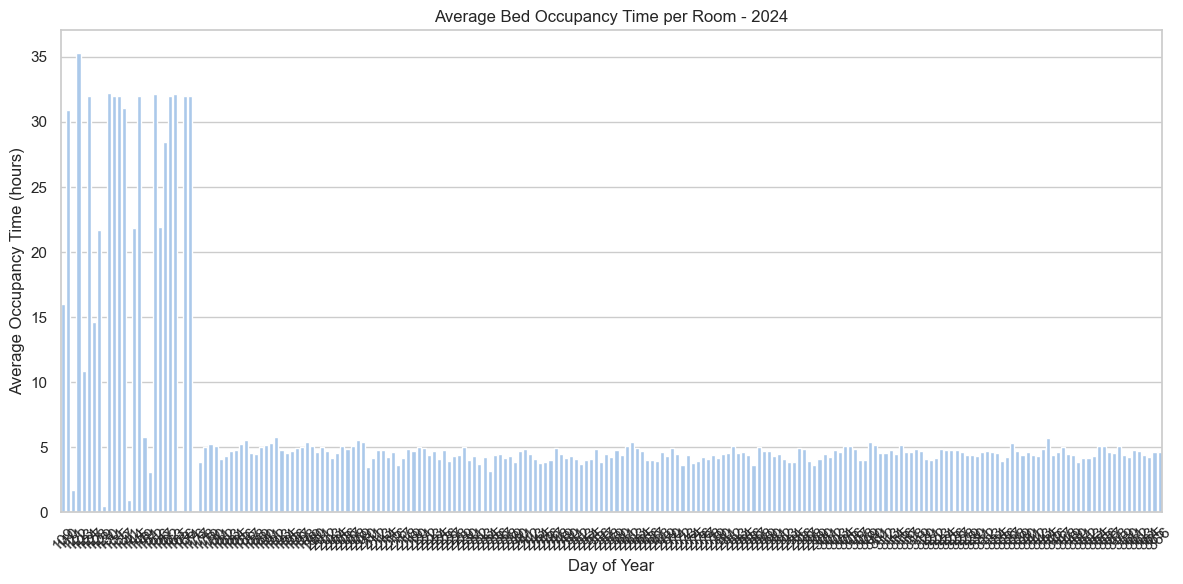

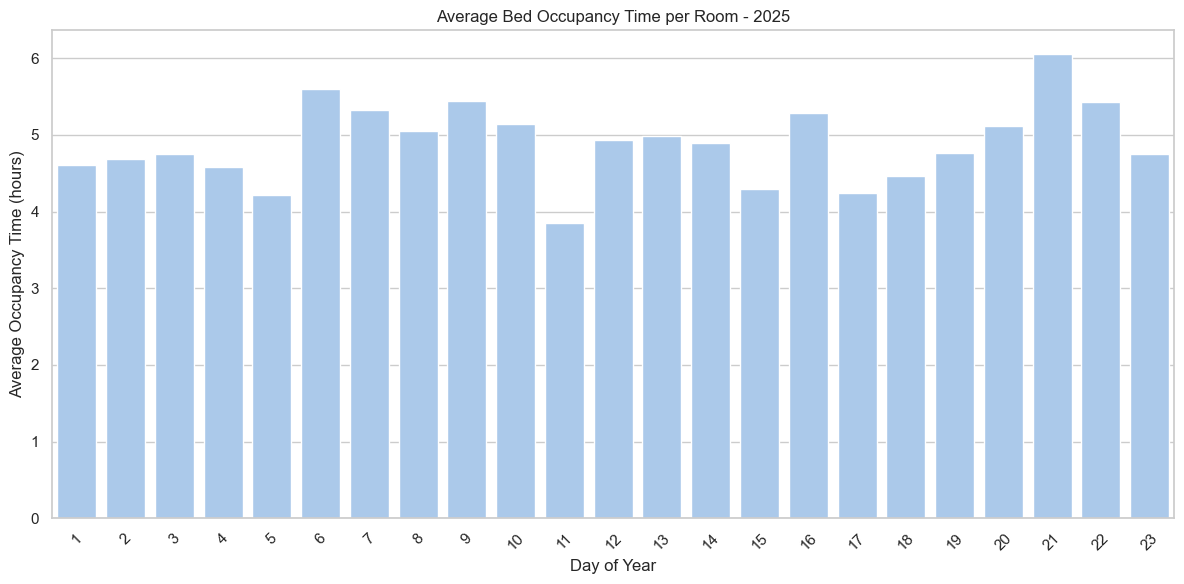

In [11]:
# add day of year column  
Bed_ds['day_of_year'] = Bed_ds['dt'].dt.dayofyear

for year in Bed_ds['dt'].dt.year.unique():
    tmp_ds = Bed_ds[Bed_ds['dt'].dt.year == year]
    
    # average daily bed occupnacy time
    grouped_ds = tmp_ds.groupby('day_of_year').mean('dt_diff')

    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")
    sns.set_palette("pastel")
    plt.title('Average Bed Occupancy Time per Room - {0}'.format(year))
    sns.barplot(data=grouped_ds, x='day_of_year', y='dt_diff', estimator='mean')
    plt.xlabel('Day of Year')
    plt.ylabel('Average Occupancy Time (hours)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



### Analysis of Average Bed Occupancy Time per Room (2024 & 2025)

**Year 2025:**

* Insufficient data available for comprehensive analysis, with only one month of records.
* The limited data appears consistent, showing no significant fluctuations or outliers in average bed occupancy time per room.

**Year 2024:**

* **First Month Anomaly:** A period of significant volatility in average bed occupancy time is observed during the first month of the year. Many rooms exhibit average occupancy times reaching up to 30 hours.
* **Subsequent Consistency:** For the remainder of 2024, the average bed occupancy time per room appears relatively stable, hovering around 5 hours.

**Interpretation & Recommendations:**

The stark contrast in average occupancy times between the first month and the rest of 2024 warrants immediate attention from hospital staff. The unusually high fluctuations in the first month suggest a potential issue that needs to be investigated. Possible causes could include:

* **Data Quality Issues:** Errors in data entry or collection during that specific period.
* **Internal Hospital Events:** Changes in procedures, staffing shortages, or specific events that impacted bed turnover.
* **External Factors:** External incidents (e.g., a local emergency) that led to a surge in admissions and prolonged stays.

A thorough review of the data and hospital operations for the first month of 2024 is recommended to identify the root cause of these anomalies and ensure data accuracy and efficient bed management.

In [12]:
# Generate a combined plot displaying the total number of daily arrivals
# alongside the daily average bed occupancy time. This dual visualization
# aims to provide insights into:
# 1) The seasonal patterns of patient arrivals throughout the year, allowing
#    for the identification of peak and low seasons.
# 2) The correlation between the volume of daily arrivals and the average
#    duration patients occupy beds. Observing this relationship can help
#    understand if higher arrival numbers lead to longer average stays or vice versa,
#    potentially indicating capacity constraints or efficient patient flow.

_grouped_ds = Bed_ds.groupby('day_of_year')
_mean = _grouped_ds.mean('dt_diff')
_count = _grouped_ds.count()

# make a new dataframe with the mean and count of each day
mean_count_df = pd.DataFrame({
    'day_of_year': _mean.index,
    'mean_dt_diff': _mean['dt_diff'],
    'count': _count['dt_diff']
})

mean_count_df

,day_of_year,mean_dt_diff,count
day_of_year,,,
1,1,4.609404,166
2,2,4.686792,161
3,3,4.753922,158
4,4,4.581432,143
5,5,4.214861,140
...,...,...,...
362,362,4.670734,153
363,363,4.429279,125
364,364,4.223725,146


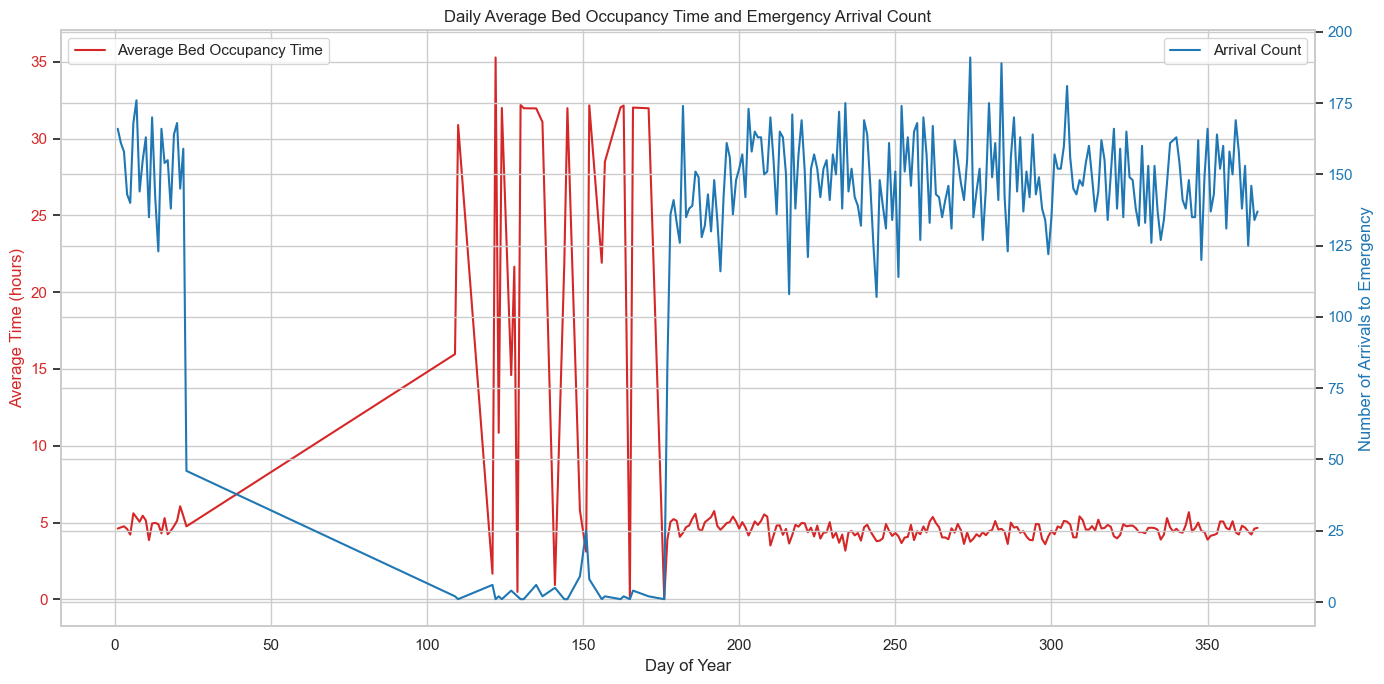

In [13]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the mean on the primary y-axis
color = 'tab:red'
sns.lineplot(data=mean_count_df, x='day_of_year', y='mean_dt_diff', color=color, ax=ax1, label='Average Bed Occupancy Time')
ax1.set_xlabel('Day of Year')
ax1.set_ylabel('Average Time (hours)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a secondary y-axis
ax2 = ax1.twinx()
color = 'tab:blue'
sns.lineplot(data=mean_count_df, x='day_of_year', y='count', color=color, ax=ax2, label='Arrival Count')
ax2.set_ylabel('Number of Arrivals to Emergency', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Daily Average Bed Occupancy Time and Emergency Arrival Count')
fig.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### Analysis of Daily Arrivals and Average Bed Occupancy Time

**Observations:**

1.  **Data Anomaly (Days 25-175):** The period between day 25 and day 175 exhibits significant and erratic fluctuations in both daily arrivals and average bed occupancy time. Due to the high degree of variability, it is difficult to draw any meaningful conclusions from this data segment. Potential causes include data errors, internal hospital events, or external incidents. This period will be excluded from further inferential analysis.

2.  **Number of Arrivals:**
    * Throughout the majority of the year, the number of daily arrivals fluctuates around an average of approximately 150.
    * The amplitude (range of variation) of these fluctuations appears to be more pronounced between days 200 and 300 (approximately three months), suggesting a period of greater variability in patient inflow during this time.

3.  **Average Bed Occupancy Time:** The daily average bed occupancy time demonstrates a relatively steady fluctuation around a mean of approximately 5 hours throughout the year.

4.  **Covariation between Arrivals and Occupancy:** A low degree of covariation is observed between the number of daily arrivals and the average bed occupancy time. The intuitive expectation is that higher patient arrival volumes would correlate with increased average occupancy times due to potential delays in procedures and bed availability. However, the data *does not* strongly support this expectation.

**Interpretation:**

The lack of a strong positive correlation between arrival numbers and average occupancy time is a notable finding. It suggests that the hospital's processes might be relatively efficient in managing patient flow even during periods of higher arrival volume, preventing significant increases in average bed occupancy time. Alternatively, other factors not captured in this analysis might be influencing bed occupancy durations. Further investigation could explore factors such as staffing levels, resource availability, and the nature of patient cases during peak arrival times.